# Prediksi Detak Jantung Berdasarkan Durasi Aktivitas Fisik

Proyek ini menggunakan regresi linear sederhana untuk menganalisis hubungan antara durasi aktivitas fisik (X) dan detak jantung (y). Dataset yang digunakan berasal dari Kaggle dan berisi berbagai metrik kebugaran.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# Memuat dataset dari file CSV

In [2]:
df = pd.read_csv("exercise_dataset.csv")

# Menampilkan 5 baris pertama
print("=== 5 Baris Pertama ===")
print(df.head())

# Cek nama kolom
print("\n=== Nama Kolom ===")
print(df.columns)

=== 5 Baris Pertama ===
   ID     Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0   1   Exercise 2     286.959851     91.892531      96.301115   45    Male   
1   2   Exercise 7     343.453036     64.165097      61.104668   25    Male   
2   3   Exercise 4     261.223465     70.846224      71.766724   20    Male   
3   4   Exercise 5     127.183858     79.477008      82.984456   33    Male   
4   5  Exercise 10     416.318374     89.960226      85.643174   29  Female   

   Duration  Heart Rate        BMI Weather Conditions  Exercise Intensity  
0        37         170  29.426275              Rainy                   5  
1        43         142  21.286346              Rainy                   5  
2        20         148  27.899592             Cloudy                   4  
3        39         170  33.729552              Sunny                  10  
4        34         118  23.286113             Cloudy                   3  

=== Nama Kolom ===
Index(['ID', 'Exercise', 

# Cek Informasi Dataset

In [3]:
# Melihat tipe data dan missing values
print("=== Info Dataset ===")
print(df.info())

# Cek jumlah data hilang
print("\n=== Jumlah Missing Values ===")
print(df.isnull().sum())

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   object 
 2   Calories Burn       3864 non-null   float64
 3   Dream Weight        3864 non-null   float64
 4   Actual Weight       3864 non-null   float64
 5   Age                 3864 non-null   int64  
 6   Gender              3864 non-null   object 
 7   Duration            3864 non-null   int64  
 8   Heart Rate          3864 non-null   int64  
 9   BMI                 3864 non-null   float64
 10  Weather Conditions  3864 non-null   object 
 11  Exercise Intensity  3864 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 362.4+ KB
None

=== Jumlah Missing Values ===
ID                    0
Exercise              0
Calories Burn         0
Dream Weight  

# Variabel independen (X) dan dependen (y)

In [4]:
X = df[['Duration']]  # pastikan kolom sesuai
y = df['Heart Rate']

print("Contoh nilai X:\n", X.head())
print("\nContoh nilai y:\n", y.head())

Contoh nilai X:
    Duration
0        37
1        43
2        20
3        39
4        34

Contoh nilai y:
 0    170
1    142
2    148
3    170
4    118
Name: Heart Rate, dtype: int64


# Scatterplot (Validasi Linearitas)

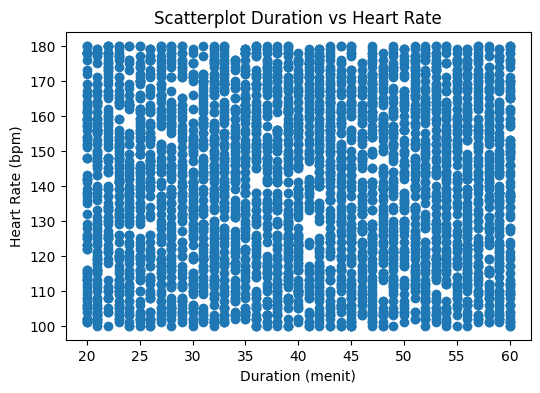

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(X, y)
plt.xlabel("Duration (menit)")
plt.ylabel("Heart Rate (bpm)")
plt.title("Scatterplot Duration vs Heart Rate")
plt.show()

# Cek ringkasan statistik

In [7]:
# Ambil hanya kolom yang relevan
df_filtered = df[['Duration', 'Heart Rate']].copy()

# Hitung IQR
Q1 = df_filtered.quantile(0.25)
Q3 = df_filtered.quantile(0.75)
IQR = Q3 - Q1

# Filter outlier berdasarkan IQR
condition = ~(
    (df_filtered < (Q1 - 1.5 * IQR)) |
    (df_filtered > (Q3 + 1.5 * IQR))
).any(axis=1)

filtered_df = df[condition]

print("Jumlah data awal :", len(df))
print("Jumlah setelah filter:", len(filtered_df))

# Update variabel untuk modeling
df = filtered_df
X = df[['Duration']]
y = df['Heart Rate']


Jumlah data awal : 3864
Jumlah setelah filter: 3864


# Split Data (Train & Test)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 3091
Jumlah data test: 773


# Training Model

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model berhasil dilatih.")
print("Intercept  :", model.intercept_)
print("Koefisien :", model.coef_[0])

Model berhasil dilatih.
Intercept  : 138.92145666014778
Koefisien : 0.018115958933234522


# Evaluasi Model

In [10]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Evaluasi Model ===")
print("R-squared :", r2)
print("RMSE      :", rmse)

=== Evaluasi Model ===
R-squared : -0.00012456387624437681
RMSE      : 23.769143097564687


# Visualisasi Garis Regresi

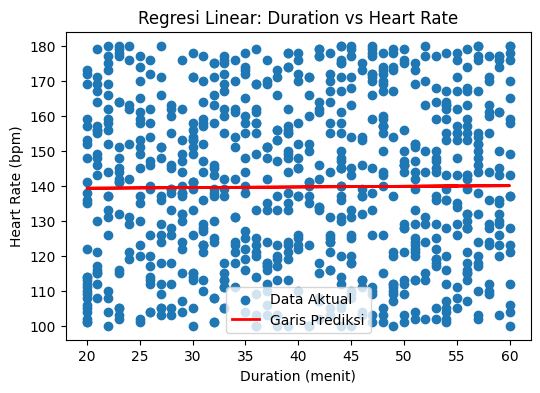

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label="Data Aktual")
plt.plot(X_test, y_pred, color="red", label="Garis Prediksi", linewidth=2)
plt.xlabel("Duration (menit)")
plt.ylabel("Heart Rate (bpm)")
plt.title("Regresi Linear: Duration vs Heart Rate")
plt.legend()
plt.show()

# Simpan Model

In [15]:
joblib.dump(model, "model_heart_rate.pkl")
print("Model disimpan sebagai model_heart_rate.pkl")

Model disimpan sebagai model_heart_rate.pkl


# Histogram Distribusi Heart Rate (Y)

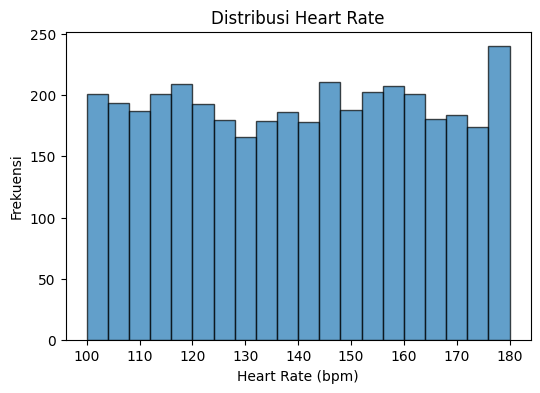

In [16]:
plt.figure(figsize=(6,4))
plt.hist(y, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribusi Heart Rate")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Frekuensi")
plt.show()

# Histogram Distribusi Duration (X)

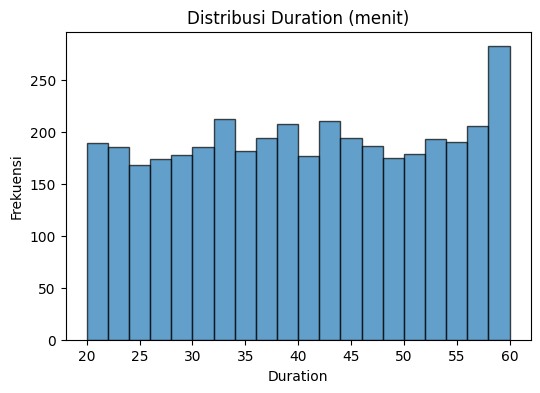

In [17]:
plt.figure(figsize=(6,4))
plt.hist(X, bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribusi Duration (menit)")
plt.xlabel("Duration")
plt.ylabel("Frekuensi")
plt.show()

# Residual Plot (Error Visual)

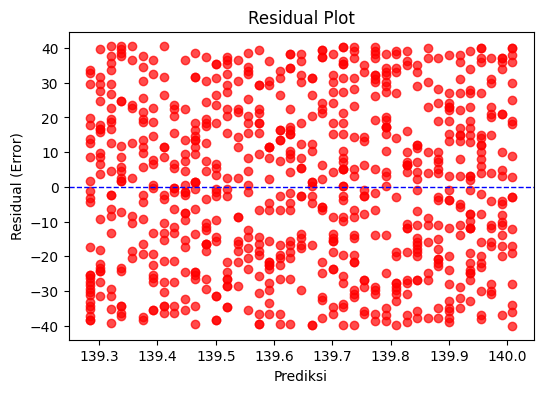

In [20]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7, color="red")  # titik residual merah
plt.axhline(0, color="blue", linestyle="--", linewidth=1)  # garis acuan hitam biar kontras
plt.title("Residual Plot")
plt.xlabel("Prediksi")
plt.ylabel("Residual (Error)")
plt.show()

# Heatmap Korelasi

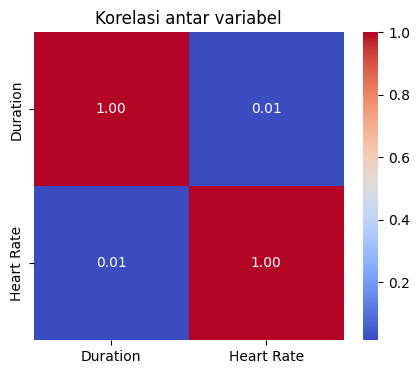

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(df[['Duration', 'Heart Rate']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar variabel")
plt.show()